# [SciPy](https://docs.scipy.org/doc/scipy-1.15.0/index.html#)

<img src="../../Auxiliary_Files/Graphics/Data_Structures/scipy_logo.png" alt="SciPy_Logo" width="600" height="300">

## Table of Contents
- [Introduction](#introduction)
- [Overview](#overview)
- [Arrays](#arrays)
    - [Basic Properties](#basic-properites)
    - [Array Creation Methods]()
    - [Example: Analyzing a 2D Image](#example-analyzing-a-2d-image)
    - [Handling NANS](#handling-nans)
    - [Stacking and Exporting Arrays](#stacking-and-exporting-arrays)
    - [Sorting & Searching](#sorting--searching)
- [Mathematical Routines](#mathematical-routines)
    - [General Functions](#basic-mathematical-functions)
    - [Statistics](#statistics)
    - [Linear Algebra](#linear-algebra)
    - [Simple Polynomial Regression Methods](#simple-polynomial-regression-methods)
- [Exercises](#exercises)
    - [Problem 1: Creating an Array in Four Different Ways](#problem-1-creating-an-array-in-four-different-ways)
    - [Problem 2: Handling NANs](#problem-2-handling-nans)
    - [Problem 3: Modeling Ingress and Egress](#problem-3-modeling-ingress-and-egress)

## Introduction

The [SciPy](https://docs.scipy.org/doc/scipy-1.15.0/index.html#) package contains a slew of different analysis methods and tools that are relevant in exoplanet research. This lesson will focus on these methods, and outline several use cases. 

 <div class="alert alert-block alert-warning">

**NOTE**: SciPy has many high level functions and optimization routines that are largely out of scope of ExoCore. These include routines that may be relevant in other aspects of astrophysics research; if you are interested, check out all SciPy modules [here](https://docs.scipy.org/doc/scipy-1.15.0/reference/index.html).

Before we begin, run the code block below to activate the interactive portions of this lesson:

In [151]:
import scipy
from jupyterquiz import display_quiz
import json
with open("../../Exercise_Solutions/Module_3/SciPy/Checkpoints/questions.json", "r") as file:
    questions=json.load(file)

## `Constants` Module

The first module in SciPy is the Constants module. The utility is in the name; this contains many relevant constants relevant in science and mathematics.

In [152]:
## Evoke pi using scipy.constants.pi

print("The value of π is: " + str(scipy.constants.pi))

## Speed of light...

c = scipy.constants.c
m_n = scipy.constants.m_n
print("The speed of light, c, is: " + str(c))
print("The mass of the neutron is: " + str(m_n))

The value of π is: 3.141592653589793
The speed of light, c, is: 299792458.0
The mass of the neutron is: 1.67492749804e-27


You can find a list of available units [here](https://docs.scipy.org/doc/scipy-1.15.0/reference/constants.html). All units are reported in [SI units](https://en.wikipedia.org/wiki/International_System_of_Units#:~:text=The%20SI%20comprises%20a%20coherent,candela%20(cd%2C%20luminous%20intensity)).

### Constants Database
In addition to the built-in constants above, SciPy has integrated an API that allows user to query the [CODATA 2022](https://arxiv.org/abs/2409.03787) constants catalog. This can be navigated using the `value(key)`, `unit(key)`, `precision(key)` and `find([substring, display_bool])`:

In [153]:
## We want to know the standard acceleration due to gravity
## Search for the string 'gravity' to see the matches
a = scipy.constants.find("gravity", True)

## Value and units

g = scipy.constants.physical_constants['standard acceleration of gravity']

print("The value of g is: " + str(g[0]))
print("The units of g are: " + str(g[1]))
print("The uncertainty of g is: " + str(g[2]))
a = scipy.constants.physical_constants['alpha particle mass energy equivalent in MeV']
print(a)

standard acceleration of gravity
The value of g is: 9.80665
The units of g are: m s^-2
The uncertainty of g is: 0.0
(3727.3794066, 'MeV', 1.1e-06)


## Integration Methods

The module `scipy.integrate` contains efficient integration methods commonly used in data analysis. Integration methods are divided into two groups:

- Definite integration over continuous function objects
- Integration over a given sample

We will describe the most commonly used methods below.

How would we find the definite integral below?
$$ \int_{1}^{3.8}\exp{\left[\cos{\frac{2}{x^{3}}}\right]} dx $$

We employ the `scipy.integrate.quad(function, lower, upper)` function!

In [12]:
## First define your function
import numpy as np
import scipy.integrate
def function(x):
    return np.exp(np.cos(2/x**(3)))

## Integrate, passing the function and bounds
## The output of the function is two element list
## The first element is the value of the integral, the second is the uncertainty
print("The value of the integral is: " + str(scipy.integrate.quad(function, 1, 3.8)[0]))
print("The uncertainty of the integral is: " + str(scipy.integrate.quad(function, 1, 3.8)[1]))

The value of the integral is: 6.918788129478686
The uncertainty of the integral is: 2.8384102869472277e-08


The `dblquad` and `tplquad` extend this to double integrals bounding an area and triple integrals bounding a volumne, respectively. For example, we can compute:

$$ \int^{x=2}_{x=0}\int^{y=1}_{y=0}xy^{2}dx\,dy

In [13]:
def function_2(y,x):
    return x*y**2

print("The double integral is: " + str(scipy.integrate.dblquad(function_2, 0, 2, 0, 1)))

The double integral is: (0.6666666666666667, 7.401486830834377e-15)


The fourth and fifth arguments can be bounding functions, too. Say we want to find the integral between the functions:
$$ h(x)=10\cos{x} + 20 ; g(x) = 20\sin{x} - 10 $$
Then we can do the following:

(752.0286072876482, 1.9993652955463403e-07)


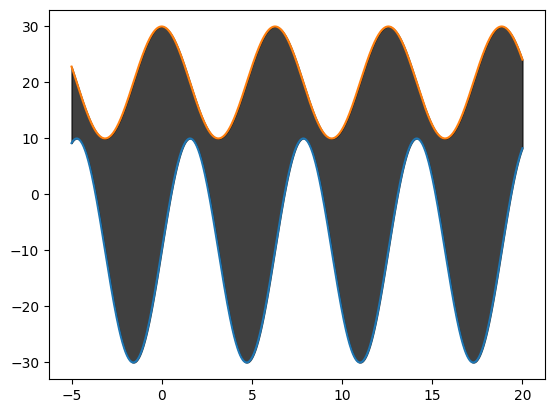

In [99]:
from matplotlib import pyplot as plt
def function_3(y,x):
    return 1
def h(x):
    return 10*np.cos(x) + 20
def g(x):
    return 20*np.sin(x) - 10

print(scipy.integrate.dblquad(function_3, -5, 20, g, h))
x = np.linspace(-5,20, num=1000)
plt.plot(x, g(x))
plt.plot(x,h(x))
plt.fill_between(x, h(x), g(x), alpha = 0.75, color='black')
plt.show()

The same logic follows for a triple integral. Say we want to find the integral of a 3D Gaussian:

$$ \int\int\int^{+\infty}_{-\infty} \exp{-(x^{2}+y^{2}+z^{2})} dzdydx $$

(5.568327996830833, 4.4619078828029765e-08)


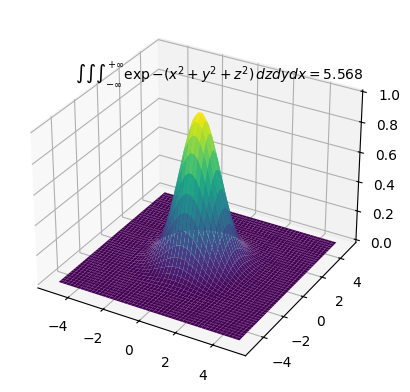

In [179]:
def gaussian(x,y,z):
    return np.exp(-(x ** 2 + y ** 2 + z ** 2))

## Takes awhile to compute!
result = scipy.integrate.tplquad(gaussian, -np.inf, np.inf, -np.inf, np.inf, -np.inf, np.inf)
print(result)


## Plot of the function we integrated over
# Create a grid of x, y values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Define the Gaussian function
def gaussian(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))

# Generate the Z values
Z = gaussian(X, Y, 0, 0, 1, 1)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.text(-7, 0, 1, "$ \\int\\int\\int^{+\\infty}_{-\\infty} \\exp{-(x^{2}+y^{2}+z^{2})}\\, dzdydx = " + str(np.round(result[0],3)) + "$")
plt.show()

## Checkpoint 1

In [210]:
display_quiz([questions[0]] + [questions[1]])

<IPython.core.display.Javascript object>

$$ \int^{2}_{0} \int^{\sqrt{x}}_{0} \, dydx $$

In [209]:
## Codespace for Checkpoint 1

## `Optimize` Module
### Example 1: Stellar Hotspots
As with any area of science, we fit models to data. `Scipy` has an `optimize` package which provides a host of fitting routines allow for least-squares regression for non-linear fits. This section goes over the most useful, `curve_fit`, which allows for fitting of nonlinear functions.

Run the cell below to get started:

In [23]:
import scipy.optimize as opt
import numpy as np
from matplotlib import pyplot as plt
## Lists to store data
time = []
flux = []
flux_err = []

## Parameters to base our data on
amp1 = 0.04
amp2 = 0.06
freq = 30
freq2 = 25
for index in range(200):
    index = index/200
    time.append(index)
    flux.append(((amp1)*np.sin(freq*index) +(amp2)*np.sin(freq2*index)) + np.random.normal(1, scale=0.01))
    flux_err.append(0.01)
    


Let's begin by plotting our data above:

Text(0, 0.5, 'Flux')

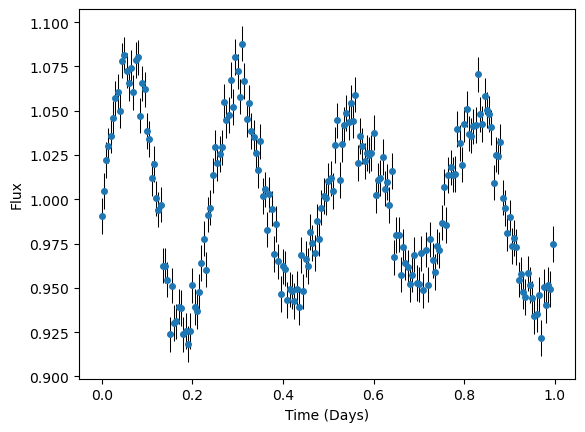

In [179]:
plt.errorbar(time, flux, yerr=flux_err, ecolor='black', elinewidth=0.75, marker='o', linestyle='', markersize=4)
plt.xlabel('Time (Days)')
plt.ylabel('Flux')

Signals similar this can appear in photometric data. They occur due to the rotation of hotspots on the stellar surface. Since the spots are cooler than the rest of the star, the observed flux fluctuates with the period of the star. Multiple hotspots can be present at once, which can give rise to patterns as seen above. Stars also exhibit **differential rotation**, where the star will rotate faster at the equator than at higher or lower latitudes, which can cause the hotspots to rotate at slightly different periods. A **simple** model of hotspots can be achieved by a sum of sines:

$$ F(t) = \Sigma^{n}_{i=0} ({A_{i}\sin{(\omega_{i}t + \phi_{i})} + A_{i+1}\sin{(\omega_{i+1}t + \phi_{i+1})}\cdots})$$
where $A$ is the amplitude in flux change due to the hotspot ($\propto$ spot area relative to the surface), $\omega$ is the rotation speed of the star at the hot spot's latitutde, and $\phi$ is the phase offset of the hotspots with respect to stellar longitude. Typically, these signals are more robustly modeled and subtracted using the Lomb-Scargle Periodogram (using a Fourier Series), which has support using the `astropy` module. For this simple example, we will model them using `scipy`.

When searching for transit signals, baseline trends (or 'red-noise') caused by stellar activity need to be removed. We will use `curve_fit` for this example to derive values for $A$ and $\omega$.

[ 0.05966186  0.03953501 24.92202065 29.93515046  0.99927256]
A1 is 0.05966186275780372
A2 is 0.03953501313336858
w1 is 24.922020645639734
w2 is 29.935150463646345
b is 0.9992725608479774


Text(0.5, 0, 'Time (days)')

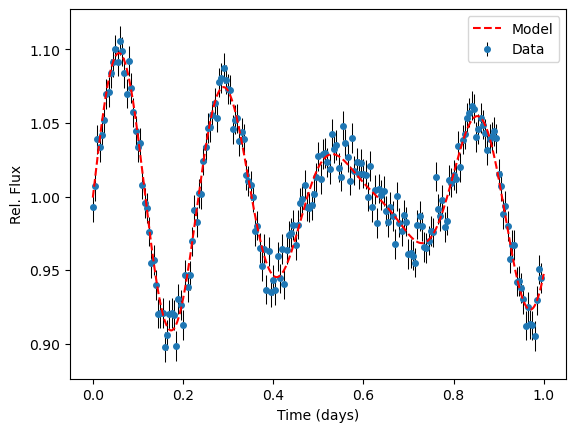

In [191]:
## Create the model to fit
def double_sine(t, a1, a2, w1, w2, b):
    return a1*np.sin(w1*t) + a2*np.sin(w2*t) + b

## To call curve fit, pass the function above along with your data
popt, pcov = opt.curve_fit(double_sine, time, flux, p0=[0.03, 0.02, 30, 30, 1], absolute_sigma=flux_err, maxfev=10000)

print(popt)
## Extract the fitted parameters
print('A1 is ' + str(popt[0]))
print('A2 is ' + str(popt[1]))
print('w1 is ' + str(popt[2]))
print('w2 is ' + str(popt[3]))
print('b is ' + str(popt[4]))
x = np.linspace(0,1, num=1000)
plt.errorbar(time, flux, yerr=flux_err, ecolor='black', elinewidth=0.75, marker='o', linestyle='', markersize=4, zorder=-11, label='Data')
plt.plot(x, double_sine(x, popt[0], popt[1], popt[2], popt[3], popt[4]), linestyle='--', color='red', label='Model')
plt.legend()
plt.ylabel('Rel. Flux')
plt.xlabel('Time (days)')

### Example 2: Stellar Flares
Stellar flares are eruptions of plasma and photons occuring at the surface of a star's surface due to the reconnection of magnetic field lines. These manifest in photometry as as **sudden increase in brightness** that decays, usually exponentially, over the span of a few minutes to a couple of hours. We will import real TESS photometry of a flare on [Proxima Centauri](https://www.aanda.org/articles/aa/full_html/2022/02/aa42337-21/aa42337-21.html) which has three known exoplanets around it.

Text(0.5, 0, 'Time (BJD - 2457000)')

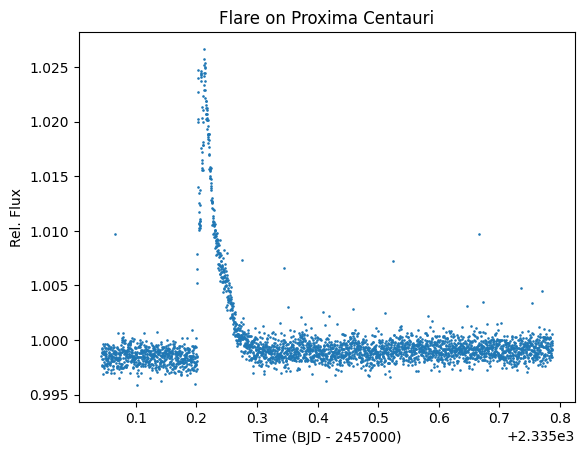

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv("../../Auxiliary_Files/Data/Data_Structures/Prox_Cen.csv")
time = data['time']
rel_flux = data['Normalized_Flux']
flux_err = data['error']
plt.scatter(time, rel_flux, s = 0.75)
plt.title("Flare on Proxima Centauri")
plt.ylabel("Rel. Flux")
plt.xlabel("Time (BJD - 2457000)")

Closely examined, we can see the flare actually has two outbursts; flares can occur in outbursts, so it is not uncommon to see multiple decay profiles in one event. In this case, however, we will only consider the last decay profile, which is the most prominent here. To model the flare, we will adopt the following model for the decay profile:
$$ F(t) = a \exp{[-b(t - t_{0})]} + c$$
where $a$ is the amplitude of the flare, $t_{0}$ is the temportal offset of the flare peak, and $c$ is the flux offset. Implementing this in python:

In [100]:
def exp_decay(x, A, t0, D):
    return A*np.exp(-t0*x) + D


Since we only want to model the data *after* the peak of the flare, we want to splice the time and data starting at the peak. We can do this using the `np.argmax` function:

Text(0, 0.5, 'Rel. Flux')

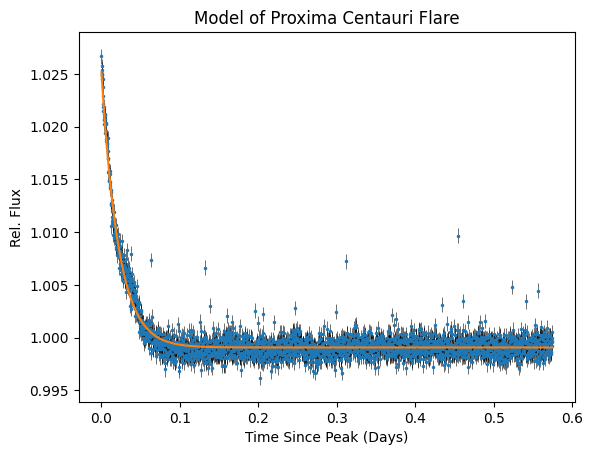

In [114]:
## Reimport so that we can rerun the block as much as we need
data = pd.read_csv("../../Auxiliary_Files/Data/Data_Structures/Prox_Cen.csv")
time = data['time']
rel_flux = data['Normalized_Flux']
flux_err = data['error']


## Splice the data so that we begin at the flare peak
idx = np.argmax(rel_flux)
time = time[idx:] - time[idx]
rel_flux = rel_flux[idx:]
flux_err = flux_err[idx:]

## Run curve_fit to estimate the best fit parameters. We can estimate some of the parameters by eye
popt, pcov = opt.curve_fit(exp_decay, time, rel_flux,p0=[0.03, 1, 0.998],maxfev=10000)
plt.errorbar(time, rel_flux, yerr=flux_err,ecolor='black', elinewidth=0.4, marker='o', linestyle='', markersize=1.5, zorder=-11, label='Data')
plt.plot(time, exp_decay(time, popt[0],popt[1],popt[2]))
plt.title('Model of Proxima Centauri Flare')
plt.xlabel("Time Since Peak (Days)")
plt.ylabel("Rel. Flux")